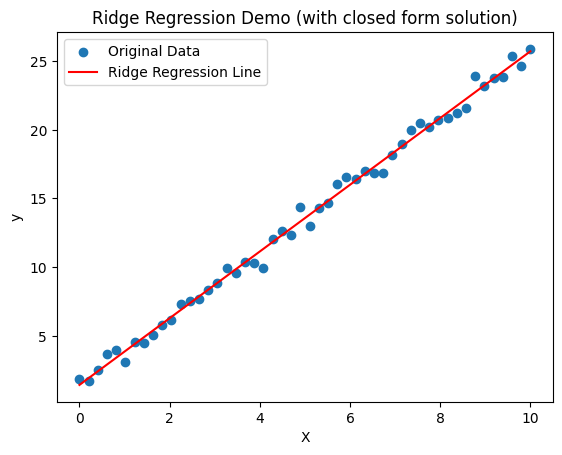

In [ ]:
# CS771 (Autumn 2023)
# ridge regression model using the closed form solution for w
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
num_samples = 50
X = np.linspace(0, 10, num_samples)
true_weights = np.array([2.5])
noise = 0.5 * np.random.randn(num_samples) # ading some noise so the x to y relationship isn't perfectly linear
y = X * true_weights + 1 + noise # true weight is w = [2.5] and bias term is 1 (effectively a 2-dim w = [1, 2.5])

# Add a column of ones to X for the bias term
X_bias = np.c_[np.ones(X.shape[0]), X]

# Ridge Regression function
def ridge_regression(X, y, lamb):
    identity = np.identity(X.shape[1])
    # w = (X'X + lambda*I)^-1
    w = np.linalg.inv(X.T.dot(X) + lamb * identity).dot(X.T).dot(y)
    return w

# Define regularization parameter (lambda) for ridge regression.
# Note: Setting it to zero will make it simple least squares regression without regularization
lamb = 0.01

# Calculate ridge regression weights using closed form solution
ridge_weights = ridge_regression(X_bias, y, lamb)

# Plot the original data and the regression line
plt.scatter(X, y, label="Original Data")
plt.plot(X, X_bias.dot(ridge_weights), color='red', label="Ridge Regression Line")
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Ridge Regression Demo (with closed form solution)')
plt.show()

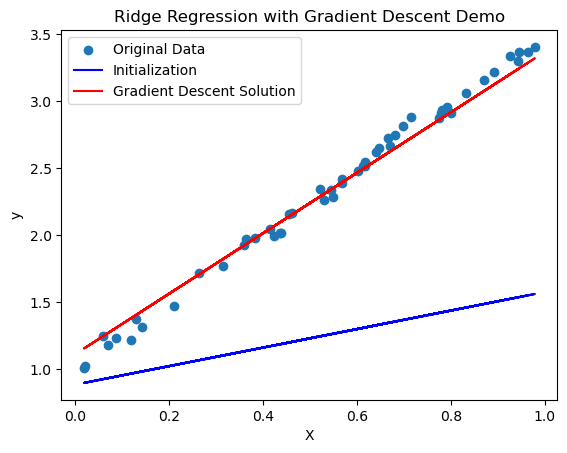

In [ ]:
# CS771 (Autumn 2023)
# ridge regression model using the gradient descent based solution for w
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
num_samples = 50
num_features = 1
X = np.random.rand(num_samples, num_features)
true_weights = np.array([2.5])
noise = 0.05 * np.random.randn(num_samples) # ading some noise so the x to y relationship isn't perfectly linear
y = X.dot(true_weights) + 1 + noise # true weight is w = [2.5] and bias term is 1 (effectively a 2-dim w = [1, 2.5])

# Ridge Regression with Gradient Descent
def ridge_regression_gradient_descent(X, y, lamb, learning_rate, num_iterations):
    num_samples, num_features = X.shape
    w = np.random.rand(num_features)

    for i in range(num_iterations):
        gradient = -(2/num_samples) * X.T.dot(y - X.dot(w)) + 2 * lamb * w
        w -= learning_rate * gradient

    return w

# Define regularization parameter (lambda) for ridge regression.
# Note: Setting it to zero will make it simple least squares regression without regularization
lamb = 0.01

# Needs for gradient descent
learning_rate = 0.1
num_iterations = 1000

# Add a column of ones to X for the bias term
X_bias = np.c_[np.ones(X.shape[0]), X]

# Calculate ridge regression weights using gradient descent
ridge_weights_gd = ridge_regression_gradient_descent(X_bias, y, lamb, learning_rate, num_iterations)


# Plot the original data, initialization, and the final solution from gradient descent
plt.scatter(X, y, label="Original Data")
plt.plot(X, X_bias.dot(np.random.rand(2)), color='blue', label="Initialization")
plt.plot(X, X_bias.dot(ridge_weights_gd), color='red', label="Gradient Descent Solution")
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Ridge Regression with Gradient Descent Demo')
plt.show()
